# Scaling - Cross Validation - Gridsearch

# Regularization (Ridge, Lasso, ElasticNet)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("Captan_v1.csv")

In [3]:
df.head()

,price,km,kw,displacement,weight,consumption_combi,co2_emission_,comfort_&_convenience_3_armrest,comfort_&_convenience_4_automatic_climate_control,comfort_&_convenience_6_cruise_control,comfort_&_convenience_15_keyless_central_door_lock,comfort_&_convenience_17_leather_steering_wheel,comfort_&_convenience_18_light_sensor,comfort_&_convenience_21_multi-function_steering_wheel,comfort_&_convenience_22_navigation_system,comfort_&_convenience_24_park_distance_control,comfort_&_convenience_25_parking_assist_system_camera,comfort_&_convenience_27_parking_assist_system_sensors_front,comfort_&_convenience_28_parking_assist_system_sensors_rear,comfort_&_convenience_30_rain_sensor,comfort_&_convenience_31_seat_heating,comfort_&_convenience_34_start-stop_system,safety_&_security_2_adaptive_cruise_control,safety_&_security_3_adaptive_headlights,safety_&_security_12_emergency_brake_assistant,safety_&_security_18_led_daytime_running_lights,safety_&_security_19_led_headlights,safety_&_security_20_lane_departure_warning_system,safety_&_security_29_xenon_headlights,extras_1_alloy_wheels,extras_11_sport_seats,extras_12_sport_suspension,extras_13_touch_screen,entertainment_&_media_2_cd_player,entertainment_&_media_3_digital_radio,entertainment_&_media_4_hands-free_equipment,entertainment_&_media_6_on-board_computer,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,...,body_color_Silver,body_color_White,body_color_Yellow,paint_type_Metallic,paint_type_Perl effect,paint_type_Uni/basic,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,drive_chain_4WD,drive_chain_front,drive_chain_rear,fuel_Benzine,fuel_Diesel,fuel_LPG/CNG,use_type_Demonstration,use_type_Employee's car,use_type_New,use_type_Pre-registered,use_type_Used,type_of_upholstery_Cloth,type_of_upholstery_Full leather,type_of_upholstery_Part leather,type_of_upholstery_Velour,type_of_upholstery_alcantara,pr_ow_0.0,pr_ow_1.0,pr_ow_2.0,pr_ow_3.0,pr_ow_4.0,doors_1.0,doors_2.0,doors_3.0,doors_4.0,doors_5.0,doors_7.0,gears_4.0,gears_5.0,gears_6.0,gears_7.0,gears_8.0,seats_2.0,seats_3.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,e_class_4.0,e_class_5.0,e_class_6.0
0,15770.0,56013.0,66.0,1422.0,1220.0,0.038,99.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,14500.0,80000.0,141.0,1798.0,1255.0,0.056,129.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,14640.0,83450.0,85.0,1598.0,1135.0,0.038,99.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,14500.0,73000.0,66.0,1422.0,1195.0,0.038,99.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,16790.0,16200.0,66.0,1422.0,1135.0,0.041,109.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


In [4]:
X = df.drop(columns = "price", axis =1)
y = df["price"]

### Train | Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling the Data

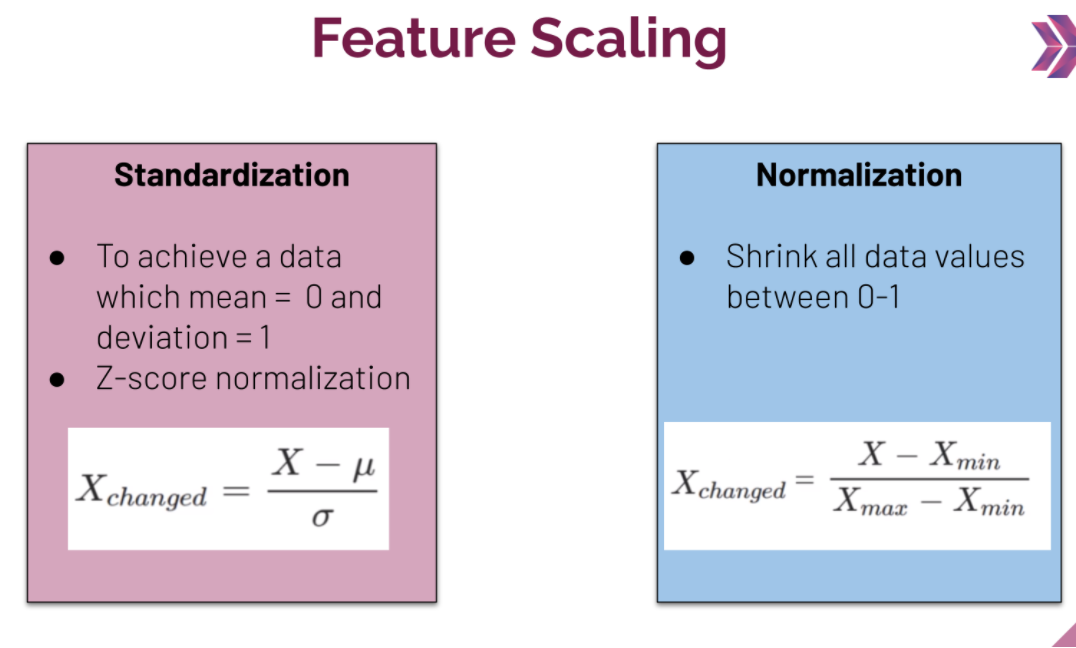

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [8]:
scaler.fit(X_train)  

StandardScaler()

In [9]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.86744016,  0.75398238, -0.10371053, ..., -0.00979874,
        -0.05637617,  0.05722673],
       [ 0.95678024, -1.399709  ,  0.2551405 , ..., -0.00979874,
        -0.05637617,  0.05722673],
       [ 2.79839209,  0.66424524,  0.76197133, ..., -0.00979874,
        -0.05637617,  0.05722673],
       ...,
       [ 0.51937119, -0.41260045, -1.45402624, ..., -0.00979874,
        -0.05637617,  0.05722673],
       [-0.47078498, -0.72668044, -1.45402624, ..., -0.00979874,
        -0.05637617,  0.05722673],
       [-0.96358488, -0.90615472,  0.0220723 , ..., -0.00979874,
        -0.05637617,  0.05722673]])

In [10]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.83002146, -0.72668044, -1.45402624, ..., -0.00979874,
        -0.05637617,  0.05722673],
       [ 0.36704634,  1.60648522,  0.36242585, ..., -0.00979874,
        -0.05637617,  0.05722673],
       [ 1.24047968, -0.90615472,  0.11086019, ..., -0.00979874,
        -0.05637617,  0.05722673],
       ...,
       [-0.96358488,  1.06806237,  0.39202182, ..., -0.00979874,
        -0.05637617,  0.05722673],
       [ 0.35270726, -0.23312617, -0.72152621, ..., -0.00979874,
        -0.05637617,  0.05722673],
       [ 1.40348067, -0.72668044, -1.45402624, ..., -0.00979874,
        -0.05637617,  0.05722673]])

### checking std = 1 and mean = 0

this gives us the z-scores. so it's also called z-score scaling

These values show where in the normal distribution they correspond to the z score.


In [11]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113
mean,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [12]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113
mean,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0


In [13]:
print("X_train_range  :", np.min(X_train_scaled), "-", np.max(X_train_scaled))
print("X_test_range   :", np.min(X_test_scaled), "-", np.max(X_test_scaled))

X_train_range  : -17.47435095150806 - 102.05390732353173
X_test_range   : -17.47435095150806 - 102.05390732353173


## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [15]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [18]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls.round(2)

,linear_train,linear_test
R2,0.89,0.89
mae,1503.43,1551.33
mse,4343236.00,4842641.95
rmse,2084.04,2200.60


## Multicolineratiy

If there is a strong correlation between the independent variables, this situation is called **multicolineraty**.
 
**Multicolineraty** prevents my model from detecting important features.

In [19]:
def color_red(val):
    
    if (val > 0.90 and val < 0.99) or (val < -0.90 and val > -0.99):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(X).corr().style.applymap(color_red)

In [20]:
pd.DataFrame(X).corr().style.background_gradient(cmap='YlOrRd')

C:\Users\49159\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\49159\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\formats\style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


## Cross Validate

We do cross-validation to check whether the one-time scores we receive are consistent or not

cross validation is only applied to the train set.

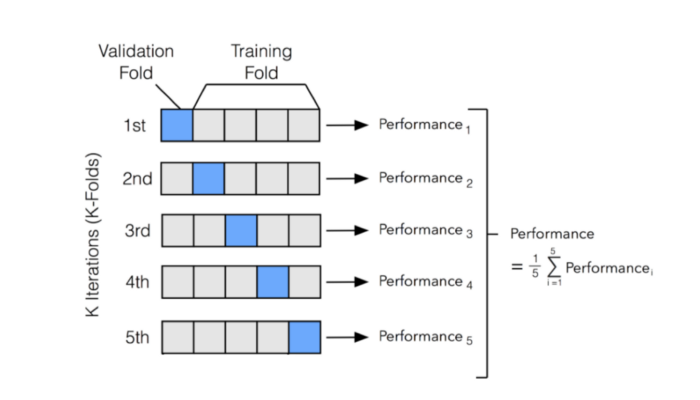

In [21]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [22]:
from sklearn.model_selection import cross_validate, cross_val_score

In [23]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 10)

In [24]:
scores

{'fit_time': array([0.19724083, 0.18673325, 0.1640861 , 0.1812923 , 0.18748903,
        0.19433737, 0.16272235, 0.15677309, 0.17606091, 0.15616584]),
 'score_time': array([0.        , 0.00501704, 0.00655651, 0.00502038, 0.0050211 ,
        0.00319958, 0.00555634, 0.005656  , 0.        , 0.00798559]),
 'test_r2': array([ 8.92591071e-01,  8.79146680e-01, -7.98579143e+24, -1.56465313e+20,
         8.92614049e-01,  8.90516879e-01, -1.19391978e+24,  8.78542442e-01,
         8.95507794e-01, -1.42214428e+25]),
 'test_neg_mean_absolute_error': array([-1.47338501e+03, -1.54052016e+03, -5.63119783e+14, -2.51283597e+12,
        -1.52112687e+03, -1.53689663e+03, -2.13253106e+14, -1.58906435e+03,
        -1.46627377e+03, -7.28067528e+14]),
 'test_neg_mean_squared_error': array([-4.09542533e+06, -4.96551247e+06, -3.30422253e+32, -6.57954707e+27,
        -4.54295320e+06, -4.44308919e+06, -4.73414398e+31, -5.23540172e+06,
        -4.17763071e+06, -5.51815700e+32]),
 'test_neg_root_mean_squared_error':

In [25]:
pd.DataFrame(scores, index = range(1,11)).round(3)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.197,0.000,8.930000e-01,-1.473385e+03,-4.095425e+06,-2.023716e+03
2,0.187,0.005,8.790000e-01,-1.540520e+03,-4.965512e+06,-2.228343e+03
3,0.164,0.007,-7.985791e+24,-5.631198e+14,-3.304223e+32,-1.817752e+16
4,0.181,0.005,-1.564653e+20,-2.512836e+12,-6.579547e+27,-8.111441e+13
5,0.187,0.005,8.930000e-01,-1.521127e+03,-4.542953e+06,-2.131420e+03
6,0.194,0.003,8.910000e-01,-1.536897e+03,-4.443089e+06,-2.107864e+03
7,0.163,0.006,-1.193920e+24,-2.132531e+14,-4.734144e+31,-6.880512e+15
8,0.157,0.006,8.790000e-01,-1.589064e+03,-5.235402e+06,-2.288100e+03
9,0.176,0.000,8.960000e-01,-1.466274e+03,-4.177631e+06,-2.043925e+03
10,0.156,0.008,-1.422144e+25,-7.280675e+14,-5.518157e+32,-2.349076e+16


In [26]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean().round(3)

test_r2                            -2.340131e+24
test_neg_mean_absolute_error       -1.506953e+14
test_neg_mean_squared_error        -9.295860e+31
test_neg_root_mean_squared_error   -4.862990e+15
dtype: float64

In [27]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear").round(3)

,linear_train,linear_test
R2,0.893,0.886
mae,1503.434,1551.333
mse,4343236.002,4842641.950
rmse,2084.043,2200.600


In [28]:
lm.coef_

array([-9.96411910e+02,  1.46150184e+03,  1.46984001e+02, -1.84655576e+02,
        2.47775134e+02, -3.89880170e+02, -1.27613319e+02,  1.12132405e+02,
        1.03970818e+02,  1.51064600e+02,  1.25915335e+02,  1.84325064e+01,
        5.34008588e+01,  1.94447568e+02,  2.06846586e+02,  8.72145961e+01,
        1.32332532e+02, -2.12418910e+02, -6.82577828e+01,  5.13296660e+01,
       -6.62757830e+01,  6.50407277e+01,  1.94573853e+01,  1.72889142e+01,
       -1.41557604e+02,  3.43708603e+02,  1.83529518e+02, -3.68282761e+01,
        1.13534721e+02,  1.90979409e+00,  9.72957411e+01, -1.16250104e+02,
       -2.43797771e+01,  3.00478968e+02, -1.10628648e+02, -1.46608335e+01,
       -9.97852185e+14, -1.00687177e+15, -9.49106570e+14, -8.70325073e+14,
       -9.12534068e+14, -7.86945744e+14, -5.21576670e+14,  1.92217800e+02,
        4.18704546e+01,  7.24093252e+01,  2.46506221e+02,  3.12256999e+02,
       -7.04361601e+01,  3.19880730e+02, -1.82119044e+00,  8.53631441e+02,
       -4.51937433e+02, -

In [29]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,-9.964119e+02
1,1.461502e+03
2,1.469840e+02
3,-1.846556e+02
4,2.477751e+02
...,...
109,8.000000e+00
110,-1.698423e+14
111,3.958808e+14
112,2.270666e+15


## Ridge Regression

Ridge and lasso and elastic-net regression are a model tuning method that is used to analyse any data that suffers from multicollinearity, underfiting and overfiting. 

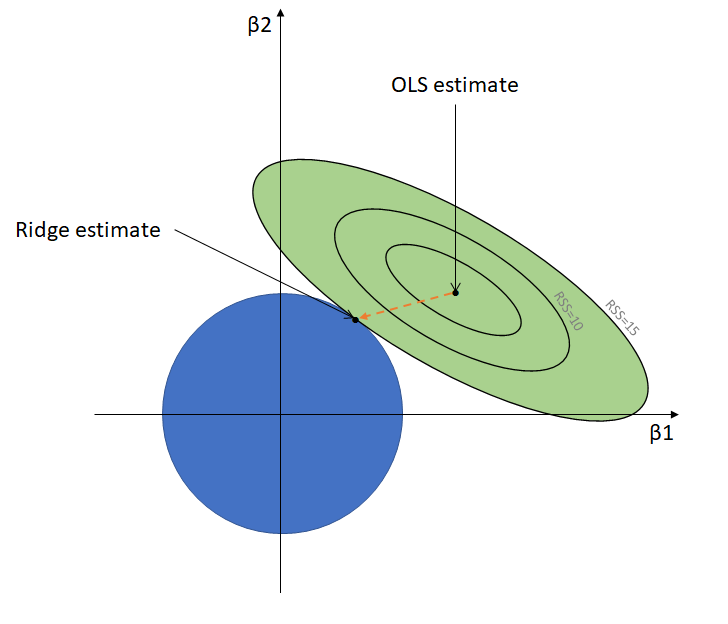

In [30]:
from sklearn.linear_model import Ridge

In [31]:
ridge_model = Ridge(alpha=1)

In [32]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [33]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [34]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs.round(2)

,ridge_train,ridge_test
R2,0.89,0.89
mae,1501.97,1549.72
mse,4341799.82,4840764.20
rmse,2083.70,2200.17


In [35]:
pd.concat([ls, rs], axis=1).round(3)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.893,0.886,0.893,0.886
mae,1503.434,1551.333,1501.968,1549.724
mse,4343236.002,4842641.950,4341799.821,4840764.197
rmse,2084.043,2200.600,2083.699,2200.174


## For Ridge Regression CV with alpha : 1 

In [36]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [37]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.022170,0.000000,0.892556,-1473.736724,-4.096773e+06,-2024.048785
2,0.032151,0.000000,0.879631,-1537.663121,-4.945608e+06,-2223.872310
3,0.030196,0.012264,0.886343,-1526.952376,-4.702707e+06,-2168.572498
4,0.033244,0.000000,0.894464,-1553.068260,-4.437926e+06,-2106.638658
5,0.033636,0.000000,0.892313,-1520.256129,-4.555701e+06,-2134.408900
6,0.035800,0.002153,0.890494,-1537.158509,-4.444031e+06,-2108.087066
7,0.021854,0.007996,0.894215,-1539.652768,-4.194610e+06,-2048.074690
8,0.031554,0.000000,0.878586,-1586.754555,-5.233514e+06,-2287.687394
9,0.017179,0.000000,0.895455,-1467.177553,-4.179733e+06,-2044.439583
10,0.025146,0.006573,0.894229,-1474.030147,-4.104090e+06,-2025.855277


In [38]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean().round(2)

test_r2                                   0.89
test_neg_mean_absolute_error          -1521.65
test_neg_mean_squared_error        -4489469.34
test_neg_root_mean_squared_error      -2117.17
dtype: float64

In [39]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge").round(2)

,ridge_train,ridge_test
R2,0.89,0.89
mae,1501.97,1549.72
mse,4341799.82,4840764.20
rmse,2083.70,2200.17


In [40]:
ridge_model.coef_.round(2)

array([-9.95610e+02,  1.45837e+03,  1.44510e+02, -1.84430e+02,
        2.39910e+02, -3.85460e+02, -1.27920e+02,  1.05460e+02,
        1.00540e+02,  1.53670e+02,  1.29540e+02,  1.50300e+01,
        4.49900e+01,  1.90770e+02,  2.11720e+02,  8.89500e+01,
        1.35300e+02, -2.08120e+02, -6.95100e+01,  5.63100e+01,
       -6.67400e+01,  6.43900e+01,  1.51900e+01,  1.79500e+01,
       -1.34400e+02,  3.40520e+02,  1.82410e+02, -3.45300e+01,
        1.08710e+02,  1.79000e+00,  9.59000e+01, -1.14430e+02,
       -2.14100e+01,  2.97770e+02, -1.08740e+02, -1.99000e+01,
        7.45570e+02,  1.28792e+03, -7.08960e+02, -1.60052e+03,
        5.97920e+02, -1.37586e+03,  1.07790e+03,  1.88700e+02,
        3.52600e+01,  7.51300e+01,  2.43690e+02,  3.08010e+02,
       -6.76700e+01,  3.20510e+02, -1.67000e+00,  8.51260e+02,
       -4.49430e+02, -8.52470e+02, -1.19738e+03,  3.97800e+01,
        5.53700e+02,  3.55670e+02, -3.05900e+01,  1.30070e+02,
        1.29550e+02,  5.89520e+02,  8.37000e+01,  2.551

In [41]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [42]:
pd.concat([lm_df,rm_df], axis = 1).round(2)

,lm_coef,ridge_coef_1
0,-9.964100e+02,-995.61
1,1.461500e+03,1458.37
2,1.469800e+02,144.51
3,-1.846600e+02,-184.43
4,2.477800e+02,239.91
...,...,...
109,8.000000e+00,0.00
110,-1.698423e+14,35.59
111,3.958808e+14,23.21
112,2.270666e+15,-4.54


## Choosing best alpha value with GridSearchCV for Ridge

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [45]:
ridge_model = Ridge()

In [46]:
param_grid = {"alpha":alpha_space}

In [47]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [48]:
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error', verbose=2)

In [49]:
grid_ridge.best_params_

{'alpha': 1.0}

In [50]:
pd.DataFrame(grid_ridge.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028632,0.004957,0.003198,0.003917,0.01,{'alpha': 0.01},-2023.989233,-2224.235885,-2168.645500,-2106.718077,-2134.366157,-2107.853976,-2048.193954,-2287.870509,-2044.690011,-2025.941247,-2117.250455,84.118698,100
1,0.031165,0.002387,0.000799,0.002397,0.02,{'alpha': 0.02},-2023.990017,-2224.231773,-2168.644760,-2106.717278,-2134.366587,-2107.856469,-2048.192708,-2287.868398,-2044.687313,-2025.940264,-2117.249557,84.118047,99
2,0.026776,0.003504,0.003198,0.003916,0.03,{'alpha': 0.03},-2023.990796,-2224.227670,-2168.644021,-2106.716479,-2134.367016,-2107.858959,-2048.191463,-2287.866293,-2044.684618,-2025.939284,-2117.248660,84.117399,98
3,0.027261,0.003872,0.002401,0.003668,0.04,{'alpha': 0.04},-2023.991572,-2224.223578,-2168.643281,-2106.715680,-2134.367446,-2107.861446,-2048.190219,-2287.864194,-2044.681927,-2025.938306,-2117.247765,84.116753,97
4,0.024333,0.001320,0.003949,0.003952,0.05,{'alpha': 0.05},-2023.992343,-2224.219495,-2168.642541,-2106.714881,-2134.367875,-2107.863930,-2048.188976,-2287.862100,-2044.679240,-2025.937331,-2117.246871,84.116109,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.028843,0.004608,0.001829,0.003157,0.96,{'alpha': 0.9600000000000001},-2024.047024,-2223.885444,-2168.575437,-2106.641876,-2134.407164,-2108.078150,-2048.079358,-2287.693873,-2044.449096,-2025.858344,-2117.171577,84.066208,5
96,0.026376,0.002996,0.002697,0.003817,0.97,{'alpha': 0.97},-2024.047469,-2223.882150,-2168.574702,-2106.641072,-2134.407598,-2108.080383,-2048.078189,-2287.692247,-2044.446713,-2025.857575,-2117.170810,84.065746,4
97,0.029600,0.004224,0.001866,0.003231,0.98,{'alpha': 0.98},-2024.047911,-2223.878862,-2168.573967,-2106.640267,-2134.408032,-2108.082613,-2048.077022,-2287.690625,-2044.444334,-2025.856807,-2117.170044,84.065286,3
98,0.026759,0.003397,0.001600,0.003200,0.99,{'alpha': 0.99},-2024.048350,-2223.875582,-2168.573232,-2106.639462,-2134.408466,-2108.084841,-2048.075856,-2287.689007,-2044.441957,-2025.856041,-2117.169279,84.064828,2


In [51]:
grid_ridge.best_index_

99

In [52]:
grid_ridge.best_score_

-2117.1685161278497

In [53]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)

In [54]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs.round(2)

,grid_ridge_train,grid_ridge_test
R2,0.89,0.89
mae,1501.97,1549.72
mse,4341799.82,4840764.20
rmse,2083.70,2200.17


In [55]:
pd.concat([ls, rs, rgs], axis = 1).round(3)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test
R2,0.893,0.886,0.893,0.886,0.893,0.886
mae,1503.434,1551.333,1501.968,1549.724,1501.968,1549.724
mse,4343236.002,4842641.950,4341799.821,4840764.197,4341799.821,4840764.197
rmse,2084.043,2200.600,2083.699,2200.174,2083.699,2200.174


In [56]:
rm = Ridge(alpha=0.02).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
rm.coef_

array([-9.95354961e+02,  1.45844880e+03,  1.44646735e+02, -1.85034129e+02,
        2.40365590e+02, -3.86021729e+02, -1.28175573e+02,  1.05393286e+02,
        1.00628367e+02,  1.53751879e+02,  1.29638732e+02,  1.49887073e+01,
        4.50517096e+01,  1.90789797e+02,  2.11473696e+02,  8.89464050e+01,
        1.35279323e+02, -2.08026124e+02, -6.95887739e+01,  5.63570762e+01,
       -6.68617361e+01,  6.43650007e+01,  1.51942504e+01,  1.77654708e+01,
       -1.34365493e+02,  3.40464945e+02,  1.82526894e+02, -3.46201467e+01,
        1.08647122e+02,  1.81308879e+00,  9.58444210e+01, -1.14380925e+02,
       -2.13775458e+01,  2.97791983e+02, -1.08789553e+02, -1.97423475e+01,
        7.45541901e+02,  1.28821329e+03, -7.09099353e+02, -1.60116423e+03,
        5.98203277e+02, -1.37644016e+03,  1.07911436e+03,  1.89417113e+02,
        3.53084089e+01,  7.50955911e+01,  2.44422811e+02,  3.08654243e+02,
       -6.76040058e+01,  3.20201925e+02, -1.84510596e+00,  8.49198366e+02,
       -4.52378598e+02, -

In [57]:
rgm_df = pd.DataFrame(rm.coef_, columns=["ridge_coef_0.02"])

In [58]:
pd.concat([lm_df,rm_df, rgm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02
0,-9.964119e+02,-995.605602,-995.354961
1,1.461502e+03,1458.371335,1458.448803
2,1.469840e+02,144.509310,144.646735
3,-1.846556e+02,-184.431830,-185.034129
4,2.477751e+02,239.905653,240.365590
...,...,...,...
109,8.000000e+00,0.000000,0.000000
110,-1.698423e+14,35.591992,35.602799
111,3.958808e+14,23.210242,23.208875
112,2.270666e+15,-4.539986,-4.533282


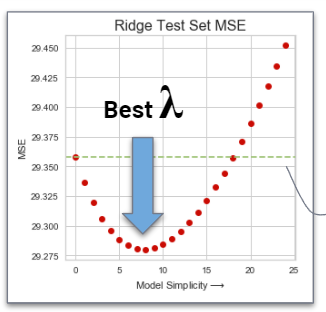

## LASSO

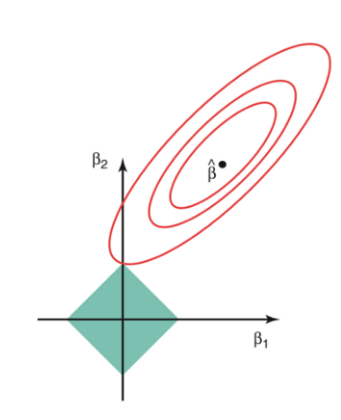

In [59]:
from sklearn.linear_model import Lasso

In [60]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled, y_train)

C:\Users\49159\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.498e+08, tolerance: 4.243e+07
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [61]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [62]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss.round(2)

,lasso_train,lasso_test
R2,0.89,0.89
mae,1501.57,1547.89
mse,4343591.37,4835802.13
rmse,2084.13,2199.05


In [63]:
pd.concat([ls, rs, rgs, lss], axis = 1).round(2)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89
mae,1503.43,1551.33,1501.97,1549.72,1501.97,1549.72,1501.57,1547.89
mse,4343236.00,4842641.95,4341799.82,4840764.20,4341799.82,4840764.20,4343591.37,4835802.13
rmse,2084.04,2200.60,2083.70,2200.17,2083.70,2200.17,2084.13,2199.05


## For Lasso CV with Default Alpha : 1

In [64]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

C:\Users\49159\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.125e+08, tolerance: 3.846e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\49159\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.960e+08, tolerance: 3.815e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\49159\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

In [65]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,1.560384,0.008003,0.892490,-1472.936195,-4.099275e+06,-2024.666609
2,1.731215,0.000000,0.879999,-1534.590660,-4.930494e+06,-2220.471651
3,1.683759,0.009933,0.886485,-1525.833090,-4.696824e+06,-2167.215744
4,1.666704,0.000000,0.894562,-1552.305332,-4.433769e+06,-2105.651685
5,1.747864,0.008669,0.892268,-1520.252965,-4.557607e+06,-2134.855177
6,1.690228,0.000000,0.890216,-1538.113865,-4.455291e+06,-2110.756040
7,1.587645,0.007996,0.894328,-1538.532047,-4.190122e+06,-2046.978858
8,1.624396,0.000000,0.878631,-1583.883839,-5.231604e+06,-2287.270021
9,1.525024,0.000000,0.895682,-1464.712449,-4.170685e+06,-2042.225380
10,1.628766,0.000000,0.894402,-1472.807700,-4.097368e+06,-2024.195551


In [66]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             8.899063e-01
test_neg_mean_absolute_error       -1.520397e+03
test_neg_mean_squared_error        -4.486304e+06
test_neg_root_mean_squared_error   -2.116429e+03
dtype: float64

In [67]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,8.933754e-01,8.858066e-01
mae,1.501575e+03,1.547893e+03
mse,4.343591e+06,4.835802e+06
rmse,2.084128e+03,2.199046e+03


In [68]:
lasso_model.coef_

array([-9.96979369e+02,  1.46481306e+03,  1.40182557e+02, -1.73142503e+02,
        2.17802839e+02, -3.64774499e+02, -1.24137323e+02,  1.04995976e+02,
        9.86446255e+01,  1.51859959e+02,  1.26818972e+02,  1.19332183e+01,
        4.16572548e+01,  1.88977784e+02,  2.10915029e+02,  8.87787317e+01,
        1.33280874e+02, -2.03066388e+02, -6.55062739e+01,  5.47296620e+01,
       -6.43543319e+01,  6.42039190e+01,  1.33412744e+01,  1.97718941e+01,
       -1.32962884e+02,  3.41354200e+02,  1.81005898e+02, -3.19198815e+01,
        1.08114690e+02,  4.25503745e-01,  9.48604700e+01, -1.12370104e+02,
       -2.08009215e+01,  2.97636825e+02, -1.06753660e+02, -1.96430244e+01,
        7.82156560e+02,  1.32156383e+03, -6.75794650e+02, -1.56207006e+03,
        6.24988428e+02, -1.34067233e+03,  1.08205933e+03,  1.58792624e+02,
        3.18844310e+01,  7.27345370e+01,  2.08665212e+02,  2.78218632e+02,
       -6.96835220e+01,  3.12160192e+02,  0.00000000e+00,  8.72361773e+02,
       -4.18176505e+02, -

In [69]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [70]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1
0,-9.964119e+02,-995.605602,-995.354961,-996.979369
1,1.461502e+03,1458.371335,1458.448803,1464.813057
2,1.469840e+02,144.509310,144.646735,140.182557
3,-1.846556e+02,-184.431830,-185.034129,-173.142503
4,2.477751e+02,239.905653,240.365590,217.802839
...,...,...,...,...
109,8.000000e+00,0.000000,0.000000,0.000000
110,-1.698423e+14,35.591992,35.602799,33.194219
111,3.958808e+14,23.210242,23.208875,22.143490
112,2.270666e+15,-4.539986,-4.533282,-3.634810


## Choosing best alpha value with GridSearchCV for Lasso

In [ ]:
lasso_model = Lasso(max_iter=100000)

In [ ]:
param_grid = {"alpha":alpha_space}

In [73]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [74]:
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\49159\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.784e+08, tolerance: 3.846e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END .........................................alpha=0.01; total time= 3.4min


In [ ]:
grid_lasso.best_params_

NameError: name 'grid_lasso' is not defined

In [ ]:
pd.DataFrame(grid_lasso.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003983,0.000604,0.000399,0.000489,0.01,{'alpha': 0.01},-0.640074,-0.455180,-0.453849,-0.568445,-0.312742,-0.766548,-0.355874,-0.505170,-1.460154,-0.357387,-0.587542,0.319524,1
1,0.004198,0.000601,0.000600,0.000490,0.02,{'alpha': 0.02},-0.755804,-0.431334,-0.429478,-0.608526,-0.305372,-0.926101,-0.405952,-0.549365,-1.563317,-0.416638,-0.639189,0.355174,2
2,0.002008,0.000644,0.000393,0.000482,0.03,{'alpha': 0.03},-0.783366,-0.463347,-0.445451,-0.640952,-0.335884,-0.994760,-0.468963,-0.606199,-1.587274,-0.483266,-0.680946,0.352629,3
3,0.001551,0.000471,0.000201,0.000402,0.04,{'alpha': 0.04},-0.776570,-0.449286,-0.428381,-0.631607,-0.347871,-1.039017,-0.482644,-0.623430,-1.611260,-0.487520,-0.687759,0.362388,4
4,0.001900,0.000537,0.000300,0.000458,0.05,{'alpha': 0.05},-0.819641,-0.449879,-0.413288,-0.638668,-0.364049,-1.114269,-0.502632,-0.644489,-1.658988,-0.506370,-0.711227,0.380164,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.001400,0.000801,0.000199,0.000398,0.96,{'alpha': 0.9600000000000001},-1.181334,-1.350946,-0.785174,-1.256340,-1.265645,-2.057793,-1.216126,-1.500068,-2.359069,-1.079459,-1.405195,0.443365,96
96,0.001100,0.000538,0.000202,0.000403,0.97,{'alpha': 0.97},-1.189395,-1.361578,-0.793297,-1.264663,-1.275626,-2.066898,-1.222854,-1.511752,-2.367082,-1.085341,-1.413848,0.443697,97
97,0.001002,0.000454,0.000201,0.000402,0.98,{'alpha': 0.98},-1.197490,-1.372261,-0.801454,-1.273044,-1.285635,-2.076027,-1.229610,-1.523502,-2.375114,-1.091254,-1.422539,0.444030,98
98,0.000999,0.000633,0.000301,0.000459,0.99,{'alpha': 0.99},-1.205620,-1.382994,-0.809646,-1.281482,-1.295670,-2.085181,-1.236396,-1.535317,-2.383165,-1.097197,-1.431267,0.444365,99


In [ ]:
grid_lasso.best_index_

0

In [ ]:
grid_lasso.best_score_

-0.5875421384283508

In [ ]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [ ]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

,grid_lasso_train,grid_lasso_test
R2,0.987457,0.989858
mae,0.354610,0.447532
mse,0.325331,0.320103
rmse,0.570378,0.565776


In [ ]:
pd.concat([ls, rs, rgs, lss, lgs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353,0.916066,0.918582,0.987457,0.989858
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962,1.021833,1.194105,0.354610,0.447532
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050,2.176931,2.569845,0.325331,0.320103
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698,1.475443,1.603074,0.570378,0.565776


In [ ]:
lsm = Lasso(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_

array([ 4.55437318,  0.41386104,  0.14316515, -3.27936306,  3.48758515,
       -0.        ,  0.        ,  0.05343882,  0.        , -0.        ,
       -0.        , -0.21411016,  0.02441056, -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.09397831,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.40883055,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.0186714 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [ ]:
lgm_df = pd.DataFrame(lsm.coef_, columns=["lasso_coef_0.01"])

In [ ]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01
0,16.597275,3.714506,7.456255,0.696007,4.554373
1,-5.404060,0.675148,0.137861,0.000000,0.413861
2,-1.749283,0.245026,1.164867,0.000000,0.143165
3,-62.338338,-1.036922,-10.181539,0.000000,-3.279363
4,16.908587,2.496200,4.616082,3.448938,3.487585
5,-17.039680,0.250747,-1.255037,0.000000,-0.000000
6,18.331631,-0.038097,0.330428,0.000000,0.000000
7,17.363422,0.163782,0.789013,0.000000,0.053439
8,13.114621,-0.192793,-1.774795,0.000000,0.000000
9,111.076623,-1.060227,3.106391,0.000000,-0.000000


## Elastic net

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [ ]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [ ]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.894391,0.902784
mae,1.230023,1.386981
mse,2.739112,3.068501
rmse,1.655026,1.751714


In [ ]:
pd.concat([ls,rs, rgs, lss, lgs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test,elastic_train,elastic_test
R2,0.997581,-1.423718,0.987205,0.984232,0.993766,0.989353,0.916066,0.918582,0.987457,0.989858,0.894391,0.902784
mae,0.187958,2.107643,0.364623,0.557799,0.271564,0.410962,1.021833,1.194105,0.354610,0.447532,1.230023,1.386981
mse,0.062748,76.501251,0.331859,0.497710,0.161686,0.336050,2.176931,2.569845,0.325331,0.320103,2.739112,3.068501
rmse,0.250495,8.746499,0.576072,0.705486,0.402102,0.579698,1.475443,1.603074,0.570378,0.565776,1.655026,1.751714


## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [ ]:
model = ElasticNet(alpha=1, l1_ratio=0.5)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.547624,-1.018845,-2.271774,-1.507240
2,0.903256,-1.109199,-2.306241,-1.518631
3,0.918673,-1.121764,-1.455439,-1.206416
4,0.904224,-1.185324,-2.385598,-1.544538
5,0.892673,-1.435062,-2.554173,-1.598178
6,0.851579,-1.571109,-4.876523,-2.208285
7,0.898629,-1.307859,-2.193529,-1.481057
8,0.939770,-1.192495,-2.463854,-1.569667
9,0.779346,-1.668970,-6.705541,-2.589506
10,0.857503,-1.064891,-1.835097,-1.354658


In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.849328
test_neg_mean_absolute_error       -1.267552
test_neg_mean_squared_error        -2.904777
test_neg_root_mean_squared_error   -1.657818
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.894391,0.902784
mae,1.230023,1.386981
mse,2.739112,3.068501
rmse,1.655026,1.751714


In [ ]:
elastic_model.coef_

array([0.85603327, 0.24929442, 0.        , 0.30397154, 0.97032476,
       0.05791825, 0.0121961 , 0.        , 0.        , 0.        ,
       0.51222851, 0.        , 0.59352013, 0.10500738, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15851285, 0.        , 0.24709461, 0.        , 0.        ,
       0.32883609, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03940337, 0.        , 0.        , 0.        , 0.13863323,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [ ]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1,lasso_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,16.597275,3.714506,7.456255,0.696007,4.554373,0.856033
1,-5.404060,0.675148,0.137861,0.000000,0.413861,0.249294
2,-1.749283,0.245026,1.164867,0.000000,0.143165,0.000000
3,-62.338338,-1.036922,-10.181539,0.000000,-3.279363,0.303972
4,16.908587,2.496200,4.616082,3.448938,3.487585,0.970325
5,-17.039680,0.250747,-1.255037,0.000000,-0.000000,0.057918
6,18.331631,-0.038097,0.330428,0.000000,0.000000,0.012196
7,17.363422,0.163782,0.789013,0.000000,0.053439,0.000000
8,13.114621,-0.192793,-1.774795,0.000000,0.000000,0.000000
9,111.076623,-1.060227,3.106391,0.000000,-0.000000,0.000000


## Choosing best alpha value with GridSearchCV for Elastic-Net

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_model = ElasticNet(max_iter=10000)

In [ ]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [ ]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019612,0.003780,0.000300,0.000459,0.01,0.1,"{'alpha': 0.01, 'l1_ratio': 0.1}",-0.708995,-0.497416,-0.492460,-0.933867,-0.311012,-0.895848,-0.419949,-0.550828,-1.640591,-0.452782,-0.690375,0.370694,13
1,0.002798,0.000600,0.000200,0.000401,0.01,0.5,"{'alpha': 0.01, 'l1_ratio': 0.5}",-0.696573,-0.464931,-0.488251,-0.645618,-0.301419,-0.856338,-0.411330,-0.539318,-1.578926,-0.433894,-0.641660,0.347104,11
2,0.003297,0.000459,0.000301,0.000459,0.01,0.7,"{'alpha': 0.01, 'l1_ratio': 0.7}",-0.691543,-0.456031,-0.473748,-0.608671,-0.304173,-0.834613,-0.398742,-0.541070,-1.536383,-0.411820,-0.625679,0.337237,9
3,0.003962,0.000928,0.000600,0.000490,0.01,0.9,"{'alpha': 0.01, 'l1_ratio': 0.9}",-0.659791,-0.445560,-0.455700,-0.584536,-0.308523,-0.795746,-0.371122,-0.513933,-1.490508,-0.372763,-0.599818,0.328054,4
4,0.004095,0.001041,0.000301,0.000460,0.01,0.95,"{'alpha': 0.01, 'l1_ratio': 0.95}",-0.647349,-0.448045,-0.451054,-0.578595,-0.309869,-0.781653,-0.363053,-0.511787,-1.478962,-0.365116,-0.593548,0.325024,3
5,0.003698,0.000780,0.000500,0.000500,0.01,0.99,"{'alpha': 0.01, 'l1_ratio': 0.99}",-0.643226,-0.453766,-0.453322,-0.571015,-0.311849,-0.770197,-0.357469,-0.506857,-1.464278,-0.358732,-0.589071,0.320795,2
6,0.003699,0.000786,0.000299,0.000456,0.01,1,"{'alpha': 0.01, 'l1_ratio': 1}",-0.640074,-0.455180,-0.453849,-0.568445,-0.312742,-0.766548,-0.355874,-0.505170,-1.460154,-0.357387,-0.587542,0.319524,1
7,0.015147,0.002573,0.000502,0.000502,0.012,0.1,"{'alpha': 0.012, 'l1_ratio': 0.1}",-0.731227,-0.489926,-0.487782,-0.853313,-0.313691,-0.923805,-0.434313,-0.570283,-1.668642,-0.464401,-0.693738,0.373332,14
8,0.002899,0.000831,0.000701,0.000459,0.012,0.5,"{'alpha': 0.012, 'l1_ratio': 0.5}",-0.727567,-0.457801,-0.481290,-0.641157,-0.304465,-0.887413,-0.429666,-0.554474,-1.592805,-0.449894,-0.652653,0.351252,12
9,0.002914,0.000408,0.000369,0.000474,0.012,0.7,"{'alpha': 0.012, 'l1_ratio': 0.7}",-0.721583,-0.445557,-0.468102,-0.619241,-0.306544,-0.867406,-0.416801,-0.554678,-1.557080,-0.426421,-0.638341,0.343667,10


In [ ]:
grid_model.best_index_

6

In [ ]:
grid_model.best_score_

-0.5875421384283508

In [ ]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=0.1)
y_train_pred = grid_model.predict(X_train_scaled)

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.987457,0.989858
mae,0.354610,0.447532
mse,0.325331,0.320103
rmse,0.570378,0.565776


## Final Model

In [ ]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [ ]:
final_model = Lasso(alpha=0.01) #grid_lasso

In [ ]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

## Feature importances with Ridge

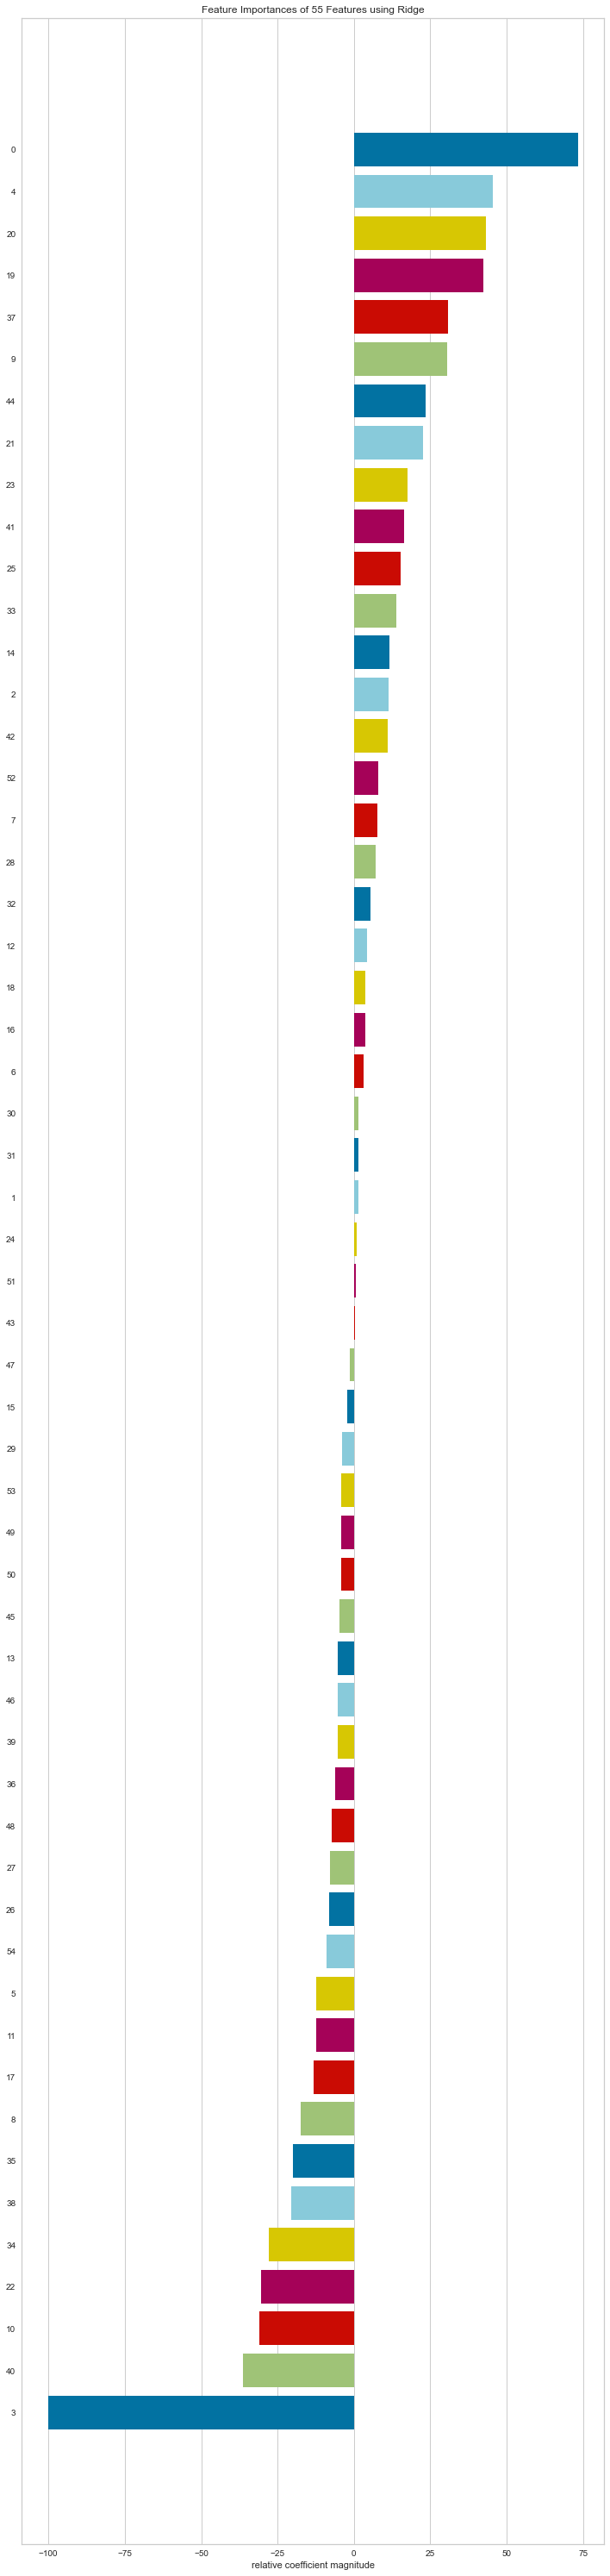

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha=0.02)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

## Feature importances with Lasso

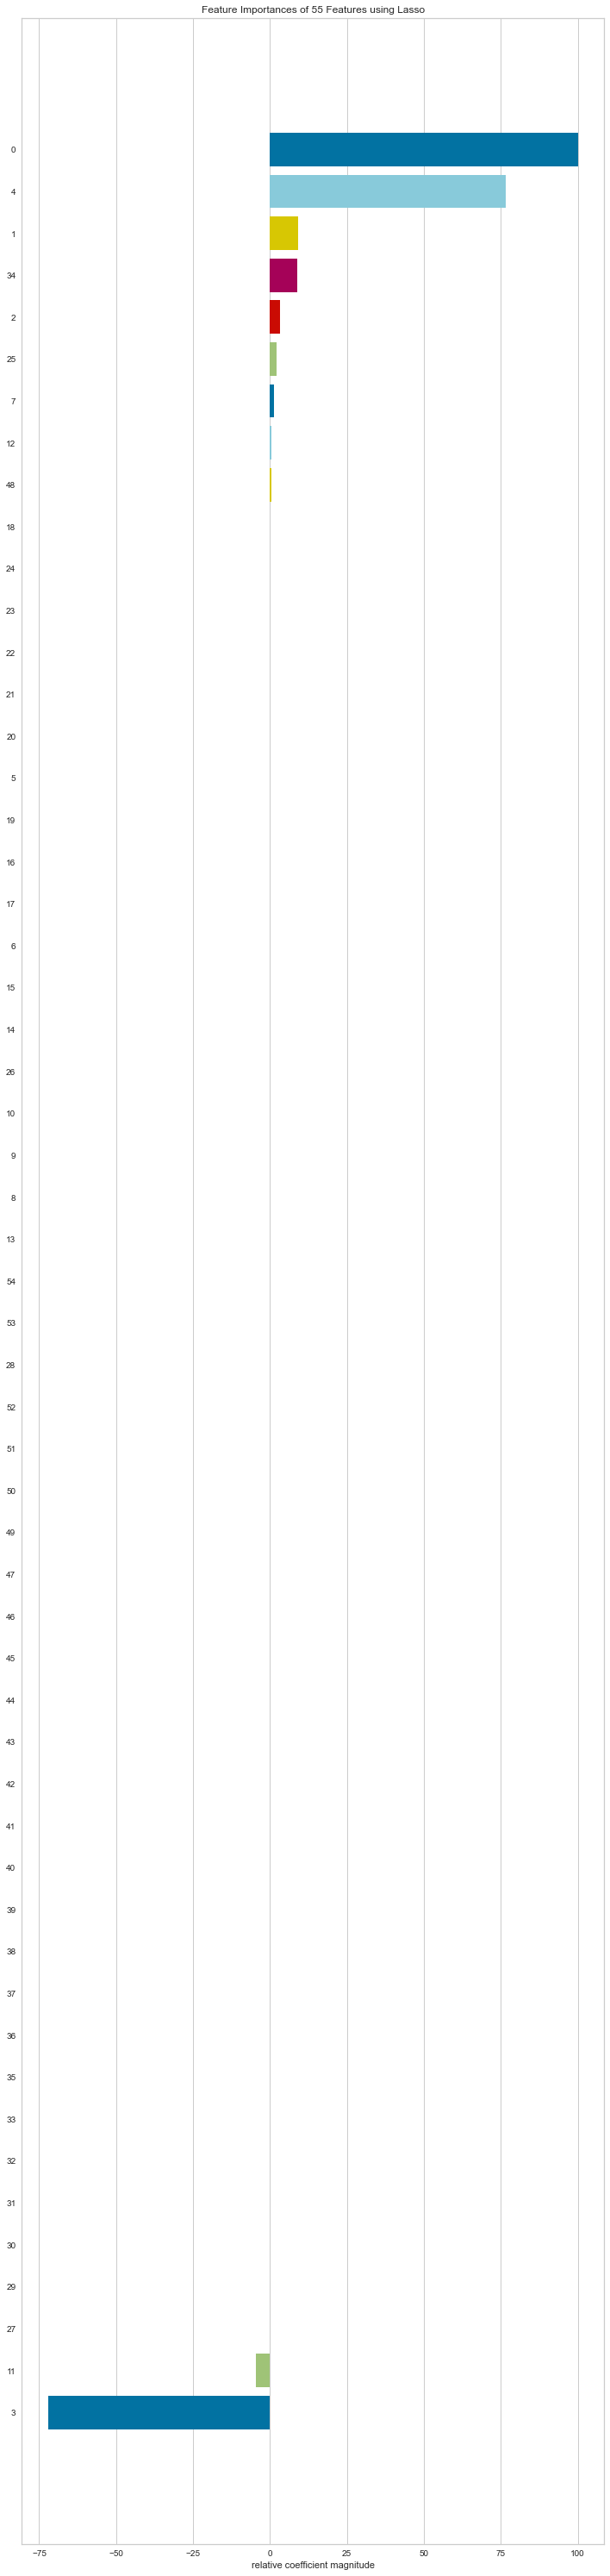

In [ ]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();